In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from google.colab import files
uploaded = files.upload()

Saving CADdataset.csv to CADdataset.csv


In [2]:
#dataset
data = pd.read_csv("CADdataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 100 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 304 non-null    object
 1   Weight              304 non-null    object
 2   Height              304 non-null    object
 3   Sex                 304 non-null    object
 4   BMI                 304 non-null    object
 5   DM                  304 non-null    object
 6   HTN                 304 non-null    object
 7   Current Smoker      304 non-null    object
 8   Obesity             304 non-null    object
 9   DLP                 304 non-null    object
 10  BP                  304 non-null    object
 11  WPE                 304 non-null    object
 12  Typical Chest Pain  304 non-null    object
 13  Atypical            304 non-null    object
 14  Nonanginal          304 non-null    object
 15  St Depression       304 non-null    object
 16  Tinversion          304 n

In [3]:
#Menghapus kolom yang tidak perlu
data = data.iloc[:, :27]
#Rename kolom
data.rename(columns = {'male':'Sex_male'}, inplace = True)
data.head()

<ipython-input-3-ade8d9a91800>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {'male':'Sex_male'}, inplace = True)


,Age,Weight,Height,Sex,BMI,DM,HTN,Current Smoker,Obesity,DLP,...,LVH,PRP,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN,CAD
0,53,90,175,Male,29.3877551,0,1,1,Y,Y,...,N,N,90,7,50,0,0,0.7,8,Cad
1,67,70,157,Fmale,28.398718,0,1,0,Y,N,...,N,N,80,26,40,4,0,1,30,Cad
2,54,54,164,Male,20.07733492,0,0,1,N,N,...,N,N,85,10,40,2,0,1,17,Cad
3,66,67,158,Fmale,26.83864765,0,1,0,Y,N,...,N,N,78,76,55,0,0,1.2,30,Normal
4,50,87,153,Fmale,37.16519287,0,1,0,Y,N,...,N,N,104,27,50,0,0,1,16,Normal


In [4]:
#Hapus data bernilai NaN /NULL
data.dropna(axis = 0, inplace = True)
print(data.head)
print(data.columns)
print(data.CAD.value_counts())

<bound method NDFrame.head of      Age  Weight  Height    Sex          BMI  DM      HTN Current Smoker  \
0     53      90     175   Male   29.3877551   0        1              1   
1     67      70     157  Fmale    28.398718   0        1              0   
2     54      54     164   Male  20.07733492   0        0              1   
3     66      67     158  Fmale  26.83864765   0        1              0   
4     50      87     153  Fmale  37.16519287   0        1              0   
..   ...     ...     ...    ...          ...  ..      ...            ...   
299   55      64     152  Fmale  27.70083102   0        0              0   
300   48      77     160  Fmale    30.078125   0        1              0   
301   57      90     159  Fmale   35.5998576   1        0              0   
302   56      85     170  Fmale  29.41176471   0        1              1   
303  Age  Weight  Length    Sex          BMI  DM  Insulin   Beta blocker   

    Obesity     DLP  ... LVH      PRP  FBS  ESR          

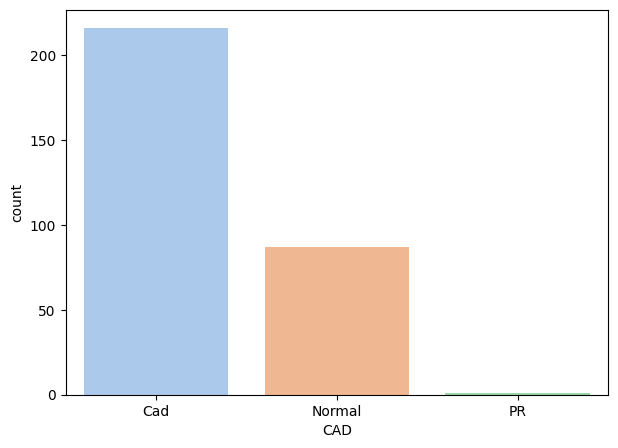

In [5]:
#Membuat plot hitungan menggunakan seaborn
plt.figure(figsize=(7, 5))
sns.countplot(x = 'CAD', data=data, palette="pastel")
plt.show()

In [6]:
# Mengubah kolom "Age" menjadi tipe data float dengan mengabaikan nilai yang tidak valid
data["Age"] = pd.to_numeric(data["Age"], errors='coerce')
# Menghapus baris dengan nilai NaN dalam kolom "Age"
data = data.dropna(subset=["Age"])

In [7]:
X = np.asarray(data[['Age', 'Current Smoker', 'St Depression','EX-Smoker']])
y = np.asarray(data['CAD'])

#normalisasi data
X = preprocessing.StandardScaler().fit(X).transform(X)

#Train-and-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=4)
print('Train set : ', X_train.shape, y_train.shape)
print('Test set : ', X_test.shape, y_test.shape)

Train set :  (212, 4) (212,)
Test set :  (91, 4) (91,)


In [8]:
#membuat model
model = LogisticRegression()

Akurasi: 0.76
              precision    recall  f1-score   support

         Cad       0.79      0.93      0.85        68
      Normal       0.55      0.26      0.35        23

    accuracy                           0.76        91
   macro avg       0.67      0.59      0.60        91
weighted avg       0.73      0.76      0.73        91



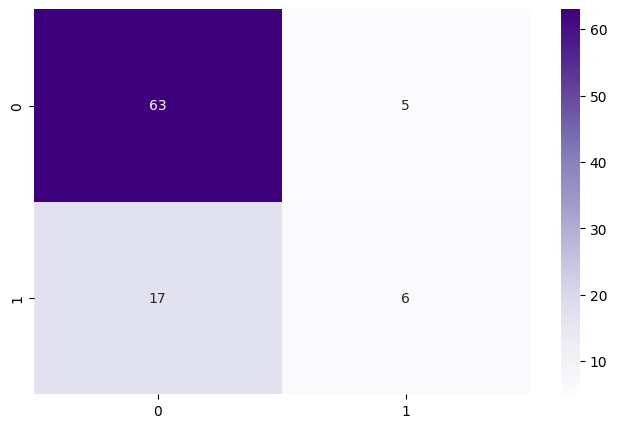

Confusion Matrix:
[[63  5]
 [17  6]]


In [13]:
# Melatih model pada data latih
#fitting the model
model.fit(X_train, y_train)

# Memprediksi label pada data uji
Y_pred = model.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, Y_pred)
print(f"Akurasi: {accuracy:.2f}")

# Menampilkan laporan klasifikasi
print(classification_report(y_test, Y_pred))

# Menampilkan confusion matrix
plt.figure(figsize = (8, 5))
conf_mat = confusion_matrix(y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Purples")
plt.show()

print("Confusion Matrix:")
print(confusion_matrix(y_test, Y_pred))